# Simple Linear Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
## Read dataset
df=pd.read_csv('height-weight.csv')

In [4]:
df


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


Text(0, 0.5, 'Height')

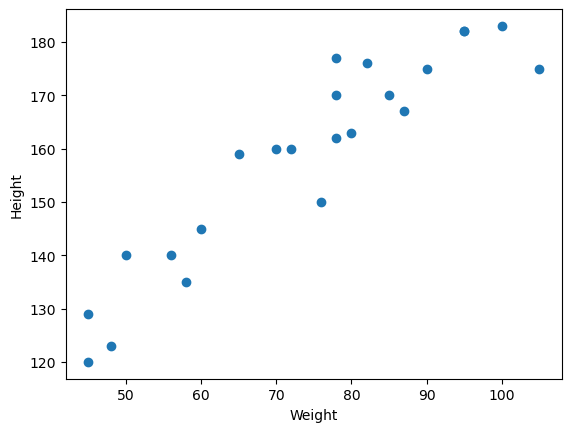

In [10]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [36]:
# Divide dataset into independent and dependent feature
X=df[['Weight']]
y=df['Height']

In [15]:
#  split the dataset into train and test set

In [17]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42) ## 20% data will be reserved for test

In [38]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [31]:
# Standardize the data  .... Train Independent feature

In [32]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler=StandardScaler()

In [41]:
X_train=scaler.fit_transform(X_train)

In [43]:
# for x_test we should not fit the data again, we should use the train data already fitted . so we should use only transform not fit_traansform

In [45]:
X_test=scaler.transform(X_test)

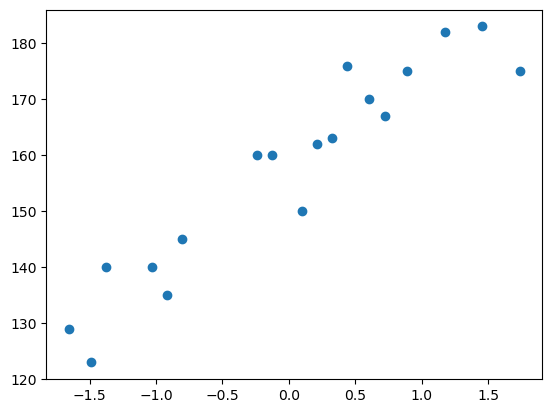

In [46]:
plt.scatter(X_train,y_train)

In [47]:
# Train Simple linear regression model

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
regressor=LinearRegression()

In [51]:
regressor.fit(X_train,y_train)

LinearRegression()

In [54]:
regressor.coef_  # gives the slope of weight

array([17.03440872])

In [55]:
regressor.intercept_

157.5

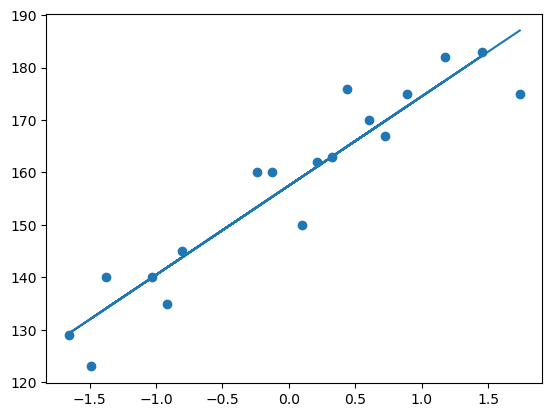

In [57]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))

# Predicted Output
  ## p=intercept + slope*(X_train)

In [66]:
y_pred_test=regressor.predict(X_test)

In [67]:
y_pred_test #predicted value

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [68]:
y_test   # actual test value

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

# Performance Metrics

In [63]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [70]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


In [71]:
from sklearn.metrics import r2_score

In [73]:
score=r2_score(y_test,y_pred_test)

In [74]:
score

0.7769869860423441

In [75]:
## Adjusted R square

In [76]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254

In [77]:
# For new values

In [78]:
scaled_weight=scaler.transform([[80]])

C:\Users\shree\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [79]:
scaled_weight

array([[0.32350772]])

In [81]:
print(regressor.predict(scaled_weight))

[163.01076266]


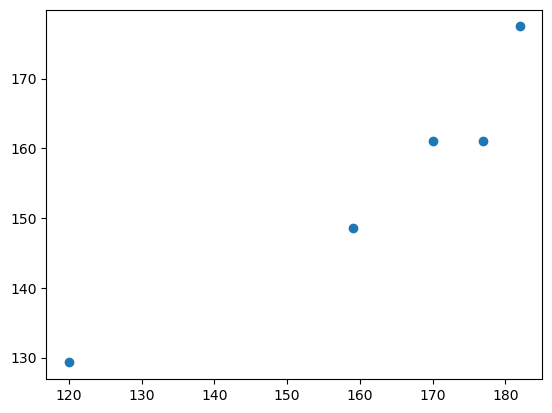

In [83]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)
# if the plot is linear we have done a good prediction

In [84]:
# Residuals 
residuals=y_test-y_pred_test

In [85]:
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\shree\AppData\Local\Temp\ipykernel_21376\3905197135.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

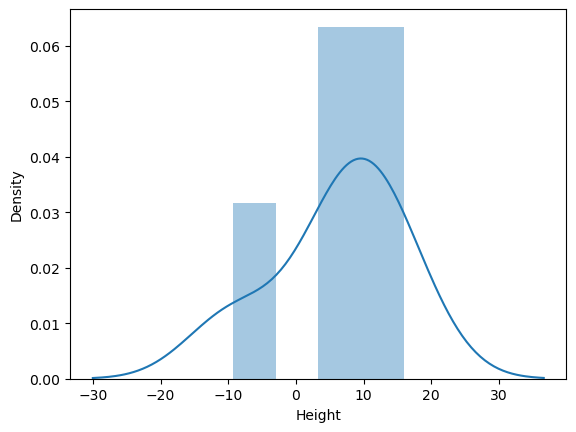

In [88]:
import seaborn as sns
sns.distplot(residuals,kde=True)

In [89]:
# If we getting normal distribution of residuals then the model is better

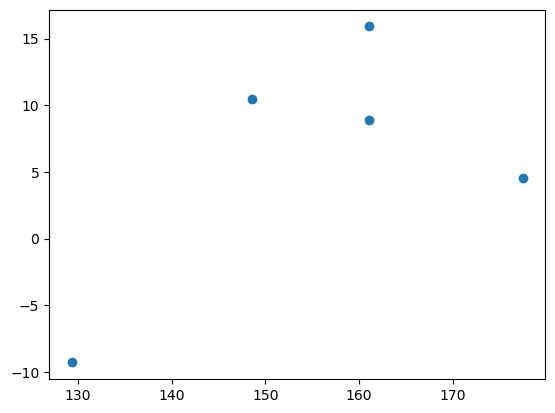

In [90]:
# scatter plot of prediction and residuals must be uniformly distributed for a model to become better one
plt.scatter(y_pred_test,residuals)